In [243]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [244]:
df = pd.read_excel('QuarterData.xlsx')

In [245]:
print(df)

     Quarter   Ratable
0 2021-08-01  0.556026
1 2021-10-30  0.561657
2 2022-01-28  0.548109
3 2022-04-28  0.572134
4 2022-07-27  0.580511
5 2022-10-25  0.605181
6 2023-01-23  0.600416
7 2023-04-23  0.634906


In [246]:
df.head()

,Quarter,Ratable
0,2021-08-01,0.556026
1,2021-10-30,0.561657
2,2022-01-28,0.548109
3,2022-04-28,0.572134
4,2022-07-27,0.580511


In [247]:
df.set_index('Quarter',inplace=True)

In [248]:
df.head()

,Ratable
Quarter,
2021-08-01,0.556026
2021-10-30,0.561657
2022-01-28,0.548109
2022-04-28,0.572134
2022-07-27,0.580511


In [249]:
df.describe()

,Ratable
count,8.000000
mean,0.582367
std,0.029304
min,0.548109
25%,0.560249
50%,0.576323
75%,0.601607
max,0.634906


<Axes: xlabel='Quarter'>

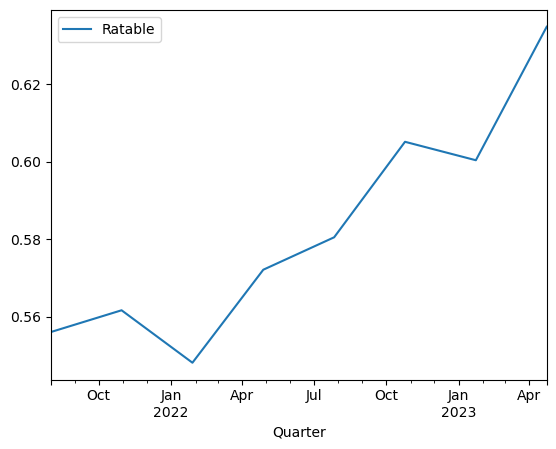

In [250]:
#Step 2. Visualize the Data
df.plot()

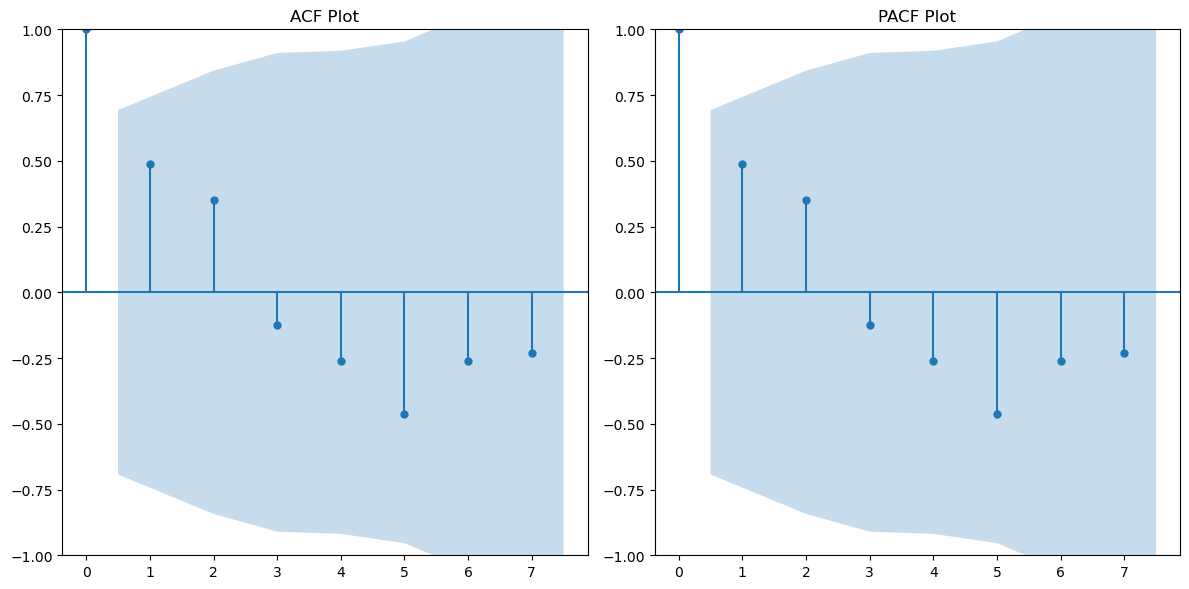

In [251]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF plot- Autocorrelation function to get the p value i.e. Max value after which it diminishes (has to be integer)
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)# grid size
plot_acf(df,lags=7, ax=plt.gca()) #display auto correlation values for the first 7 lags 
plt.title('ACF Plot')

#PACF plot-Partial Autocorrelation to get the q value i.e. Max value after which it diminishes (has to be integer)
plt.subplot(1,2,2)# grid size
plot_acf(df,lags=7, ax=plt.gca()) #display auto correlation values for the first 7 lags 
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [252]:
###Testing for Stationarity

from statsmodels.tsa.stattools import adfuller

In [253]:
#Null Hypo: It is non stationary
#Alternate Hypo: It is stationary
#95% CI considered

def adfuller_test(Ratable):
    result=adfuller(Ratable)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <=.05:
        print("Strong evidence against null hypo")
    else:
        print("Weak evidence against null hypo")

In [254]:
adfuller_test(df['Ratable'])

ADF Test Statistic:0.8832545190610718
p-value:0.9928678554409167
#Lags Used:1
Number of Observations Used:6
Weak evidence against null hypo


In [255]:
#### If it is non stationary we have to make it Stationary
### Differencing and seasonality 1 is considered
df['Seasonal First Difference']=df['Ratable']-df['Ratable'].shift(1)

In [256]:
df

,Ratable,Seasonal First Difference
Quarter,,
2021-08-01,0.556026,NaN
2021-10-30,0.561657,0.005631
2022-01-28,0.548109,-0.013548
2022-04-28,0.572134,0.024026
2022-07-27,0.580511,0.008377
2022-10-25,0.605181,0.024670
2023-01-23,0.600416,-0.004765
2023-04-23,0.634906,0.034490


In [257]:
### Again performing adfuller_test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic:-3.376610638165261
p-value:0.011782529200402346
#Lags Used:0
Number of Observations Used:6
Strong evidence against null hypo


<Axes: xlabel='Quarter'>

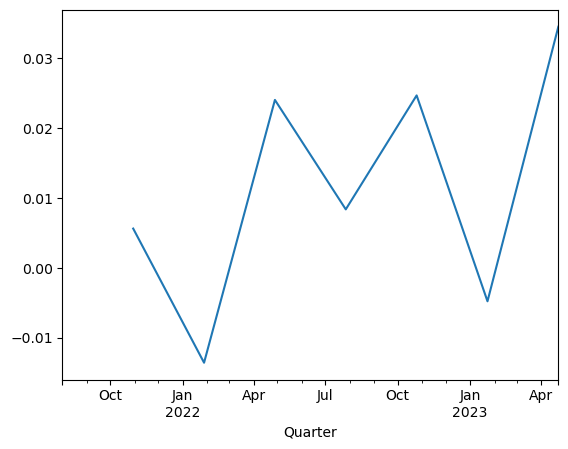

In [258]:
### Plotting the graph
df['Seasonal First Difference'].plot()

In [259]:
### For seasonal data, seasonality 4
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Ratable'],order=(1,1,1),seasonal_order=(1,1,1,4))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 90D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 90D will be used.
  self._init_dates(dates, freq)


In [260]:
results=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.32438D-01    |proj g|=  1.06722D+03

At iterate    5    f= -1.08177D+00    |proj g|=  2.45119D-01

At iterate   10    f= -1.08569D+00    |proj g|=  4.17816D+00

At iterate   15    f= -1.17327D+00    |proj g|=  3.99545D-01
  ys=-5.587E-11  -gs= 2.603E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     69      1     1     0   3.996D-01  -1.173D+00
  F =  -1.1732717521406479     

CONVERGENCE: REL_

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<Axes: xlabel='Quarter'>

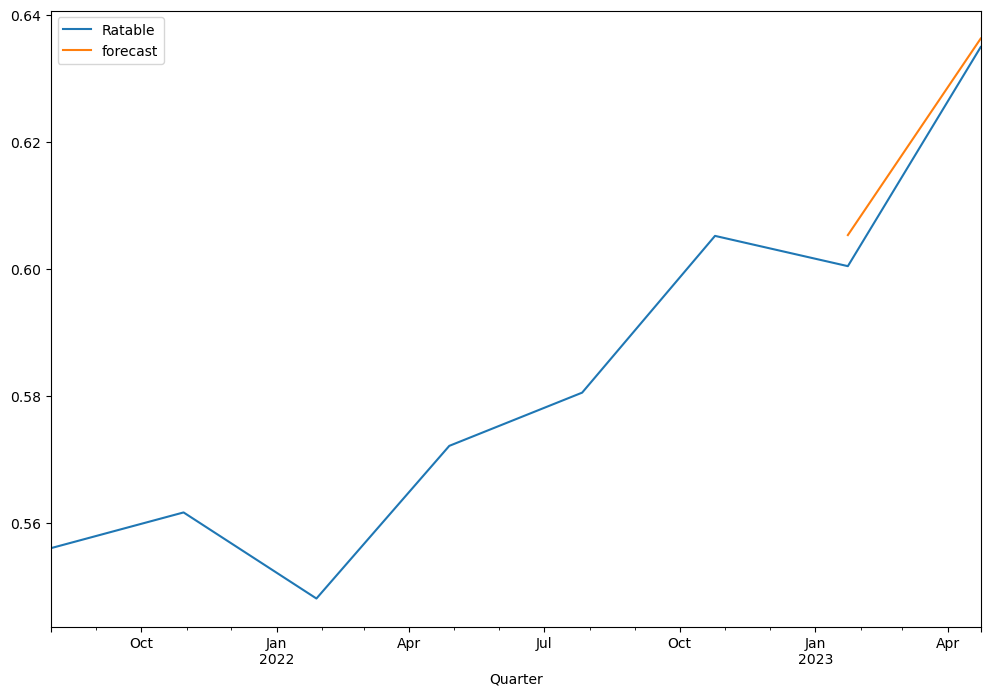

In [261]:
df['forecast']=results.predict(start=6, end = 8, dynamic=True) # testing the model performance with sample input i.e. first 5 values as input and predicting 6,7,8
df[['Ratable','forecast']].plot(figsize=(12,8))
#When setting dynamic=True in results.predict(start=6, end=8, dynamic=True), 
#it instructs the model to generate forecasts where each prediction is based 
#on the previously predicted value rather than the actual observed value, 
#essentially creating a "rolling" forecast where the model updates its predictions 
#as it moves through the time series, making it more responsive to recent changes in the data.

In [264]:
### Predicting future forecast
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(days=x)for x in range(90,451,90)]
#Syntax: range(start, stop, step)
#start: [ optional ] start value of the sequence- 90 days= 1 quarter
#stop: next value after the end value of the sequence we want till 5 quarters hence 450, so 450+1
#step: [ optional ] integer value, denoting the difference between any two numbers in the sequence i.e. 90 

In [265]:
future_dates

[Timestamp('2023-07-22 00:00:00'),
 Timestamp('2023-10-20 00:00:00'),
 Timestamp('2024-01-18 00:00:00'),
 Timestamp('2024-04-17 00:00:00'),
 Timestamp('2024-07-16 00:00:00')]

In [266]:
future_dataset_df=pd.DataFrame(index=future_dates,columns=df.columns)
future_dataset_df.index.name = 'Quarter'

In [267]:
future_dataset_df

,Ratable,Seasonal First Difference,forecast
Quarter,,,
2023-07-22,NaN,NaN,NaN
2023-10-20,NaN,NaN,NaN
2024-01-18,NaN,NaN,NaN
2024-04-17,NaN,NaN,NaN
2024-07-16,NaN,NaN,NaN


In [268]:
# fill NaN values with float
future_dataset_df['Ratable']= future_dataset_df['Ratable'].fillna(0.0)
future_dataset_df['Seasonal First Difference']= future_dataset_df['Seasonal First Difference'].fillna(0.0)
future_dataset_df['forecast']= future_dataset_df['forecast'].fillna(0.0)
future_dataset_df.head()

,Ratable,Seasonal First Difference,forecast
Quarter,,,
2023-07-22,0.0,0.0,0.0
2023-10-20,0.0,0.0,0.0
2024-01-18,0.0,0.0,0.0
2024-04-17,0.0,0.0,0.0
2024-07-16,0.0,0.0,0.0


In [269]:
future_df=pd.concat([df,future_dataset_df])
print(future_df)

             Ratable  Seasonal First Difference  forecast
Quarter                                                  
2021-08-01  0.556026                        NaN       NaN
2021-10-30  0.561657                   0.005631       NaN
2022-01-28  0.548109                  -0.013548       NaN
2022-04-28  0.572134                   0.024026       NaN
2022-07-27  0.580511                   0.008377       NaN
2022-10-25  0.605181                   0.024670       NaN
2023-01-23  0.600416                  -0.004765  0.605306
2023-04-23  0.634906                   0.034490  0.636240
2023-07-22  0.000000                   0.000000  0.000000
2023-10-20  0.000000                   0.000000  0.000000
2024-01-18  0.000000                   0.000000  0.000000
2024-04-17  0.000000                   0.000000  0.000000
2024-07-16  0.000000                   0.000000  0.000000


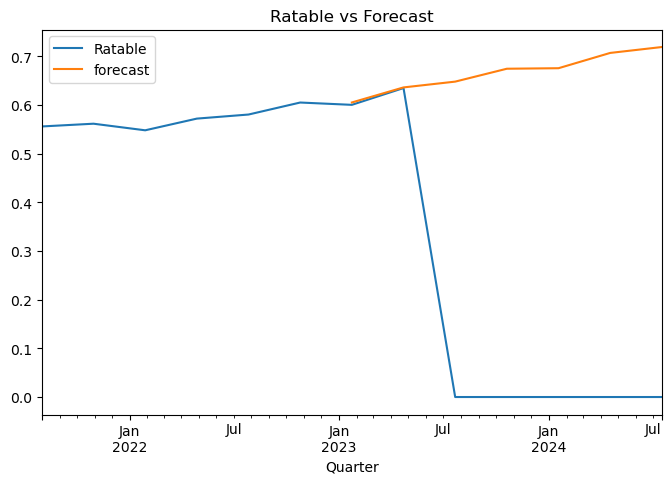

In [270]:
future_df['forecast']=results.predict(start=6, end=14, dynamic=True)
# Plot the original and forecast values
future_df[['Ratable', 'forecast']].plot(figsize=(8, 5))
plt.title('Ratable vs Forecast')
plt.show()

In [271]:
#new datagrame created with non null values for forecast
future_df1=future_df[future_df['forecast'].notna()]
# check the forecast values along with the ratable rates for the last weeks
future_df1

,Ratable,Seasonal First Difference,forecast
Quarter,,,
2023-01-23,0.600416,-0.004765,0.605306
2023-04-23,0.634906,0.034490,0.636240
2023-07-22,0.000000,0.000000,0.648141
2023-10-20,0.000000,0.000000,0.674637
2024-01-18,0.000000,0.000000,0.675699
2024-04-17,0.000000,0.000000,0.707106
2024-07-16,0.000000,0.000000,0.719244


In [272]:
# Save the new dataframe in the workbook
from openpyxl import Workbook  # openpyxl helps to read and write data in excel
future_df1_selected_cols=future_df1[['Ratable','forecast']]

# Remove the time part from the index by formatting it as date only
future_df1_selected_cols.index = future_df1_selected_cols.index.strftime('%Y-%m-%d')

future_df1_selected_cols.to_excel('SARIMA_output_ratable_quarter.xlsx', index=True, engine='openpyxl')
print('Yes the file is downloading...')

Yes the file is downloading...


In [273]:
### Draw Line chart graph in excel and save it.

import xlsxwriter

# Create an Excel writer object and use xlsxwriter as the engine
with pd.ExcelWriter('SARIMA_output_ratable_quarter.xlsx', engine='xlsxwriter') as writer:
    
    
    # Write the DataFrame to Excel
    future_df1_selected_cols.to_excel(writer, sheet_name='Analysis', index=True)

    # Access the workbook and worksheet objects
    workbook = writer.book
    worksheet = writer.sheets['Analysis']
    
    # Create a chart object (line chart)
    chart = workbook.add_chart({'type': 'line'})

    # Configure the first series (Actuals)
    chart.add_series({
        'name': 'Ratable',
        'categories': ['Analysis', 1, 0, 8, 0],  # (sheet_name, start_row=1, start_col=0 always, end_row=42, end_col=0 always)
        'values': ['Analysis', 1, 1, 8, 1],      # (sheet_name, start_row=1, start_col=1, end_row=42, end_col)
    })

    # Configure the second series (Forecast)
    chart.add_series({
        'name': 'forecast',
        'categories': ['Analysis', 1, 0, 8, 0],  # Date column for categories
        'values': ['Analysis', 1, 2, 8, 2],      # Forecast values (row 1 to 42, column 2)
    })

    # Add a chart title and axis labels
    chart.set_title({'name': 'Actuals vs Forecast'})
    chart.set_x_axis({'name': 'Quarter'})
    chart.set_y_axis({'name': 'Values'})
    
    # Set a fixed size for the chart (width and height in pixels)
    chart.set_size({'width': 1000, 'height': 600})  # You can adjust these values
    
    # Insert the chart into the worksheet
    worksheet.insert_chart('E2', chart)
    
    print('Yes the file is downloading...')

Yes the file is downloading...
